# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [ ]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [ ]:
## Declare columns from the URL provided as the dataset doesn't have columns as header
## Load csv with headers=None so that the first row is not taken as column names
## Assign cols array to the column of the dataframe

In [2]:
cols=['id','Clump','UniCellSize','UniCellShape','MargAdhe','EpiCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']
can_df=pd.read_csv('breast-cancer-wisconsin.data.txt',header=None)
can_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
0     699 non-null int64
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
can_df.columns=cols

In [5]:
can_df.head(5)

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [ ]:
## All the columns are integers except BareNuclei which is an object as it has 16 missing values

In [7]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
can_df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [ ]:
## Replace 16 values with median value of not NaN column
## After imputing the median value, convert BareNuclei column to int instead of object
## Outlier analysis
## ----------------
## id column can be discarded as mentioned in the sheet. Also, it seems to have outlier values
## 

In [12]:
can_df[can_df['BareNuclei']=='?']

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [30]:
can_df=can_df.replace('?',np.nan)
can_df.head(10)

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [14]:
median = can_df[np.logical_not(can_df['BareNuclei'].isna())]['BareNuclei'].median()
median

1.0

In [15]:
can_df.fillna(median,inplace=True)

In [16]:
can_df[can_df['BareNuclei']=='?']

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class


In [27]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [28]:
can_df['BareNuclei']=can_df['BareNuclei'].astype(int)

In [29]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null int32
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


In [39]:
can_df.describe()

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


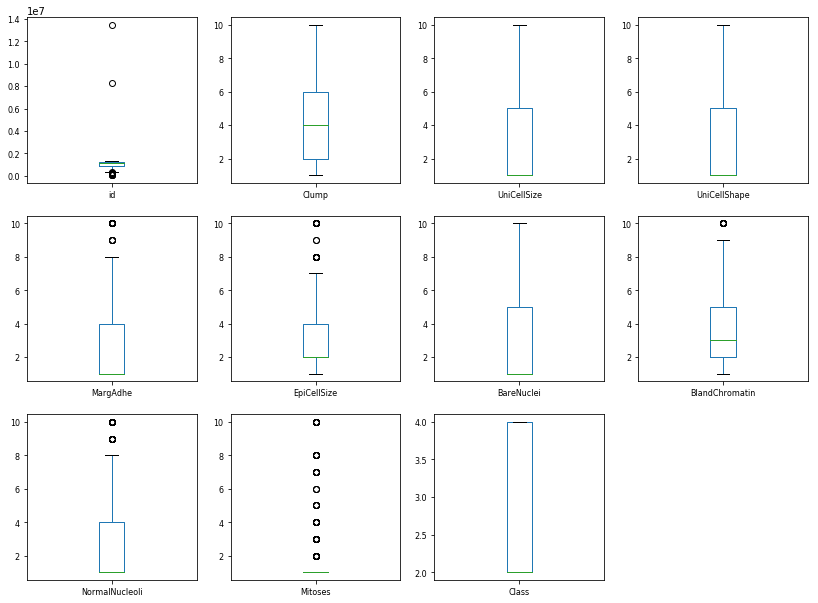

In [40]:
can_df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

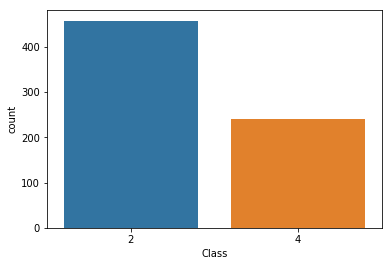

In [41]:
sns.countplot(x='Class',data=can_df)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [17]:
# Check for correlation of variable

In [18]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [19]:
#Let us check for pair plots

In [20]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [31]:
can_df.corr()

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Clump,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
UniCellSize,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
UniCellShape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
MargAdhe,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
EpiCellSize,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
BareNuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
BlandChromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
NormalNucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


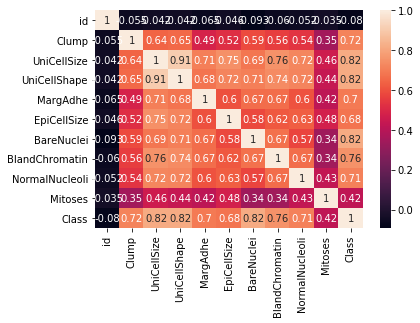

In [32]:
sns.heatmap(can_df.corr(),annot=True)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\senth\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\senth\AIML\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


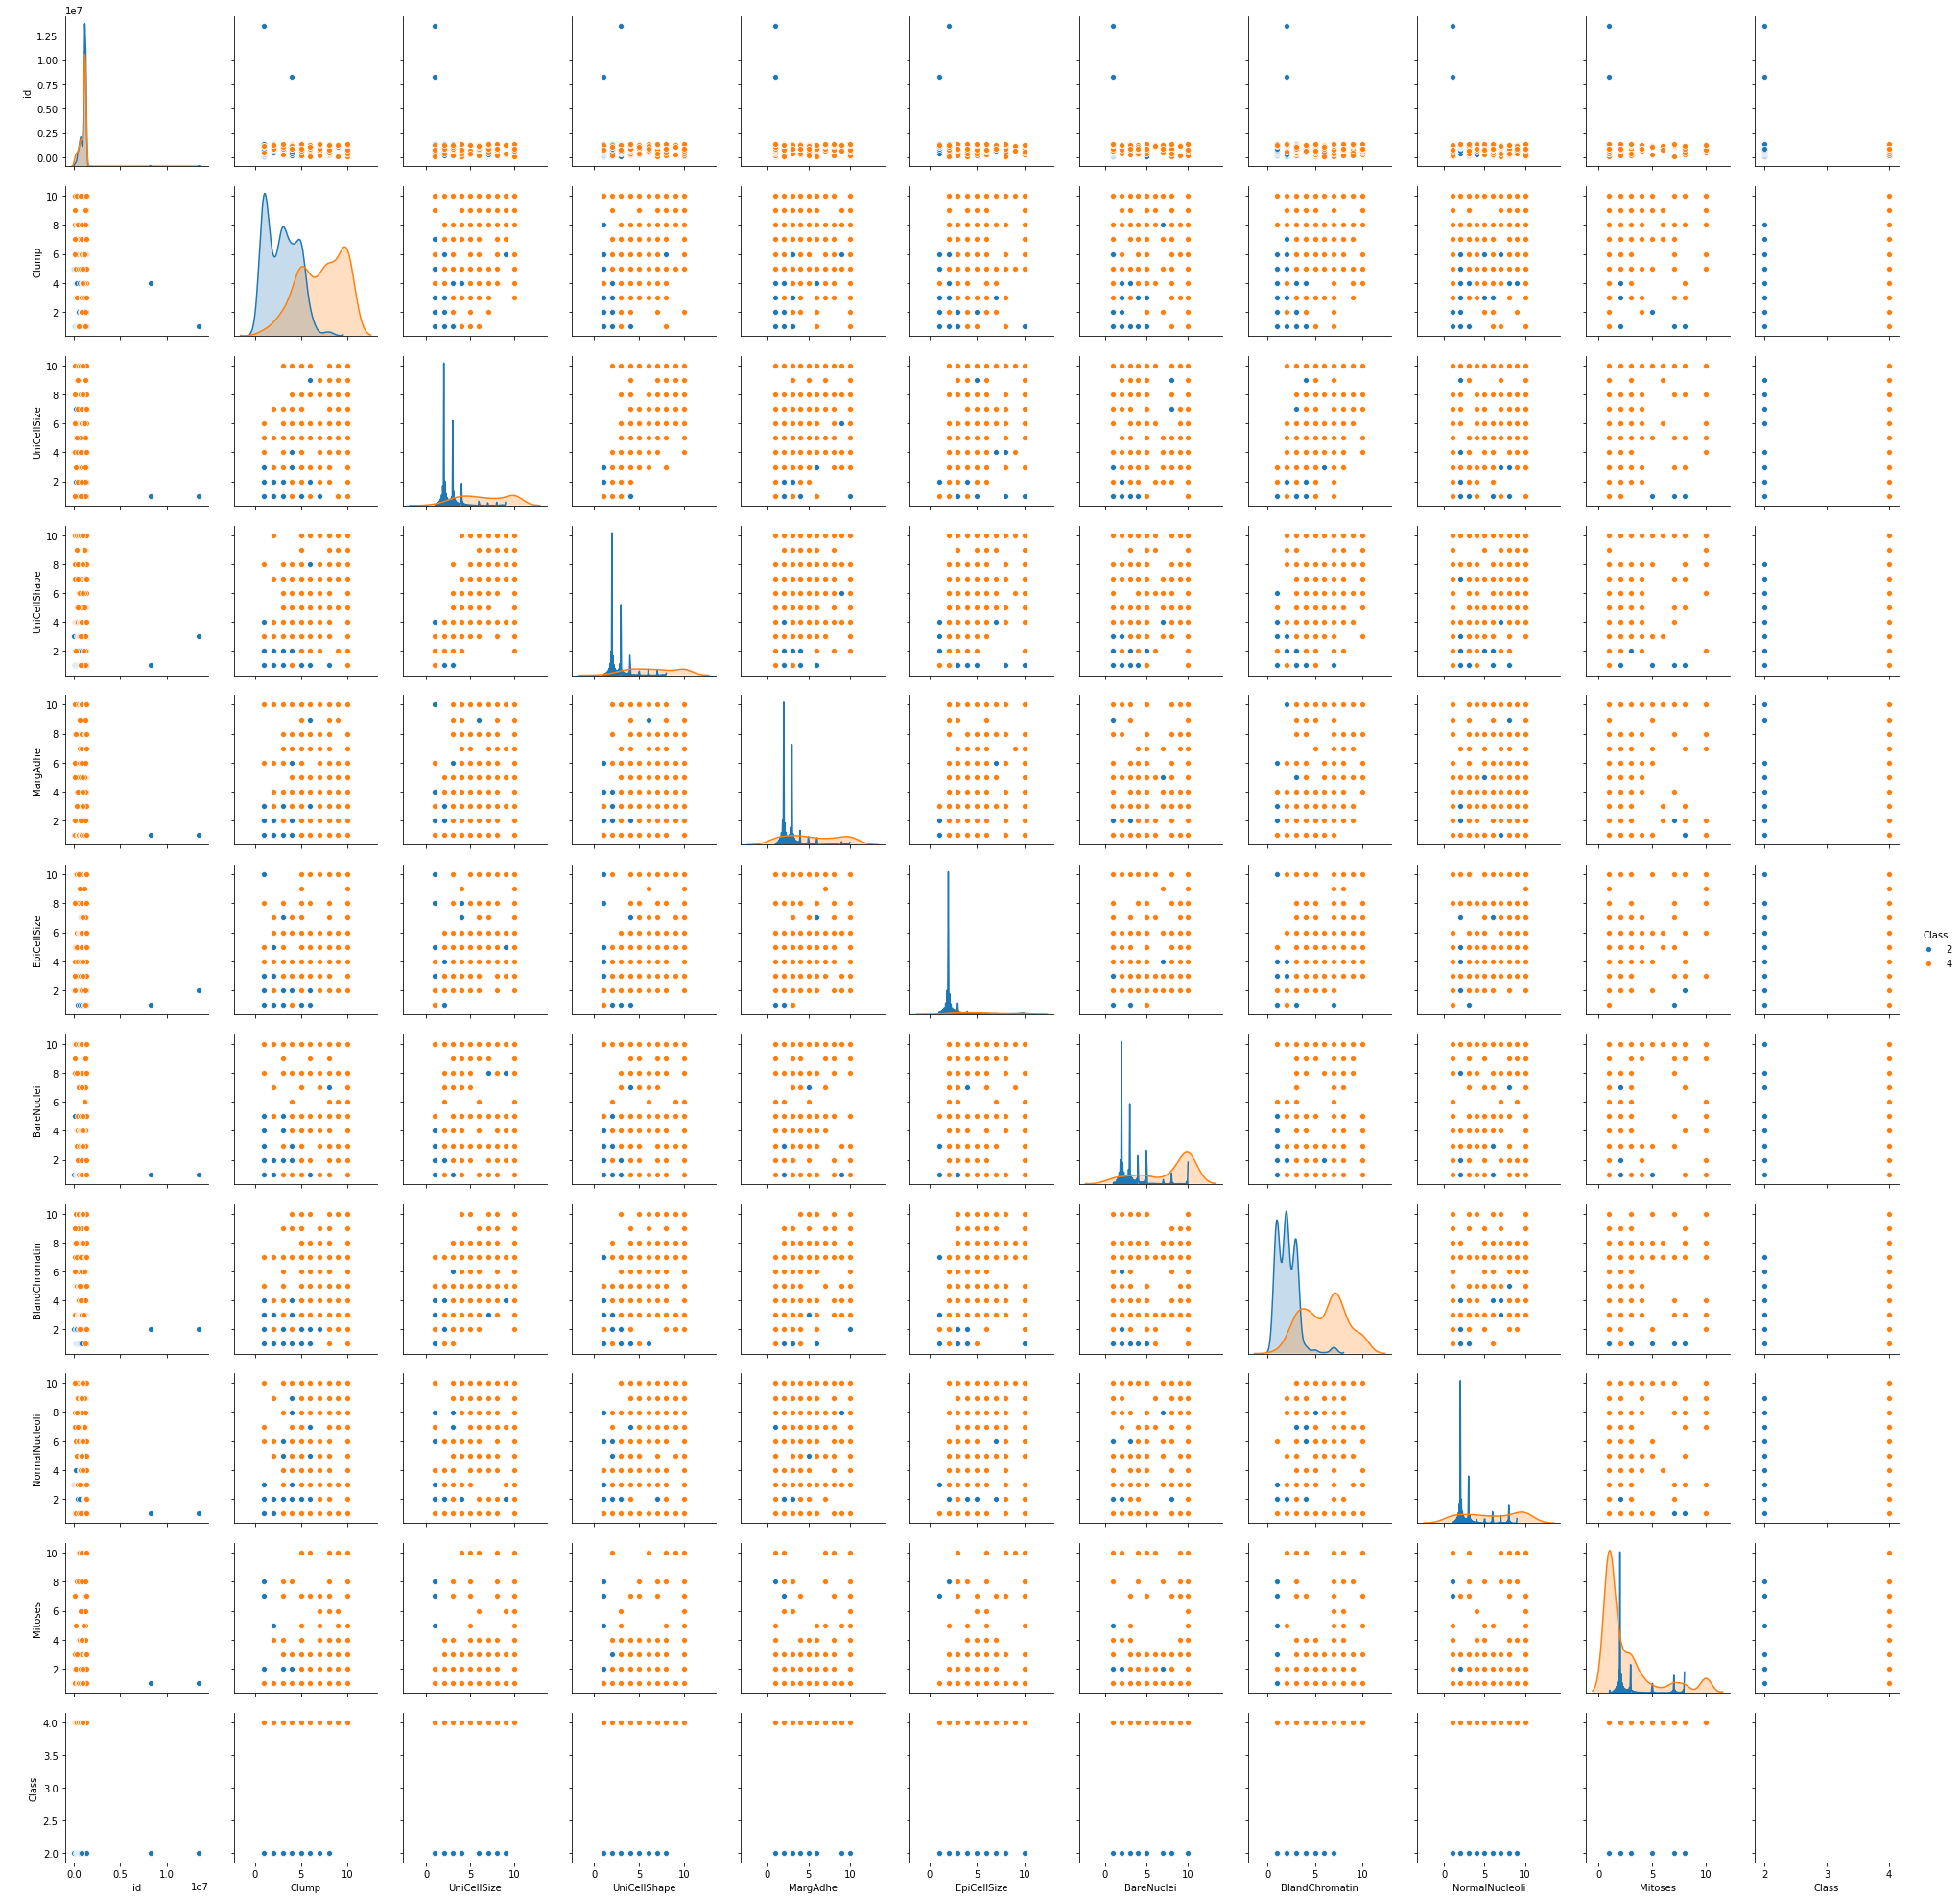

In [45]:
sns.pairplot(can_df,hue='Class',diag_kind='kde')

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [21]:
# We could see most of the outliers are now removed.

In [ ]:
## Id can be removed as it is not of any significance. Correlation is also very less
## Mitoses is the next feature that has too many outliers. So, that can be removed as well
## Other columns can be retained as they don't have too many outliers/the values are within the range

In [44]:
X = can_df[['Clump','UniCellSize','UniCellShape','MargAdhe','EpiCellSize','BareNuclei','BlandChromatin','NormalNucleoli']]
Y = can_df['Class']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,Y_train)
print(logr.score(X_test,Y_test))
print(classification_report(Y_test,logr.predict(X_test)))
print(confusion_matrix(Y_test,logr.predict(X_test)))

0.9380952380952381
             precision    recall  f1-score   support

          2       0.94      0.96      0.95       137
          4       0.93      0.89      0.91        73

avg / total       0.94      0.94      0.94       210

[[132   5]
 [  8  65]]


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_ss,Y_train)
print(knc.score(X_test_ss,Y_test))
print(classification_report(Y_test,knc.predict(X_test_ss)))
print(confusion_matrix(Y_test,knc.predict(X_test_ss)))

0.9666666666666667
             precision    recall  f1-score   support

          2       0.98      0.97      0.97       137
          4       0.95      0.96      0.95        73

avg / total       0.97      0.97      0.97       210

[[133   4]
 [  3  70]]


In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
print(svc.score(X_test,Y_test))
print(classification_report(Y_test,svc.predict(X_test)))
print(confusion_matrix(Y_test,svc.predict(X_test)))

0.9619047619047619
             precision    recall  f1-score   support

          2       0.99      0.95      0.97       137
          4       0.91      0.99      0.95        73

avg / total       0.96      0.96      0.96       210

[[130   7]
 [  1  72]]


In [65]:
from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()
bnb.fit(X_train,Y_train)
print(bnb.score(X_test,Y_test))
print(classification_report(Y_test,bnb.predict(X_test)))
print(confusion_matrix(Y_test,bnb.predict(X_test)))

0.9523809523809523
             precision    recall  f1-score   support

          2       0.97      0.96      0.96       137
          4       0.92      0.95      0.93        73

avg / total       0.95      0.95      0.95       210

[[131   6]
 [  4  69]]


In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
print(dtc.score(X_test,Y_test))
print(classification_report(Y_test,dtc.predict(X_test)))
print(confusion_matrix(Y_test,dtc.predict(X_test)))

0.9285714285714286
             precision    recall  f1-score   support

          2       0.95      0.94      0.95       137
          4       0.89      0.90      0.90        73

avg / total       0.93      0.93      0.93       210

[[129   8]
 [  7  66]]


In [67]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(X_train,Y_train)
print(bgc.score(X_test,Y_test))
print(classification_report(Y_test,bgc.predict(X_test)))
print(confusion_matrix(Y_test,bgc.predict(X_test)))

0.9428571428571428
             precision    recall  f1-score   support

          2       0.95      0.96      0.96       137
          4       0.93      0.90      0.92        73

avg / total       0.94      0.94      0.94       210

[[132   5]
 [  7  66]]


In [68]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)
print(abc.score(X_test,Y_test))
print(classification_report(Y_test,abc.predict(X_test)))
print(confusion_matrix(Y_test,abc.predict(X_test)))

0.9619047619047619
             precision    recall  f1-score   support

          2       0.98      0.96      0.97       137
          4       0.93      0.96      0.95        73

avg / total       0.96      0.96      0.96       210

[[132   5]
 [  3  70]]


In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
print(gbc.score(X_test,Y_test))
print(classification_report(Y_test,gbc.predict(X_test)))
print(confusion_matrix(Y_test,gbc.predict(X_test)))

0.9571428571428572
             precision    recall  f1-score   support

          2       0.97      0.96      0.97       137
          4       0.93      0.95      0.94        73

avg / total       0.96      0.96      0.96       210

[[132   5]
 [  4  69]]


In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
print(rfc.score(X_test,Y_test))
print(classification_report(Y_test,rfc.predict(X_test)))
print(confusion_matrix(Y_test,rfc.predict(X_test)))

0.9523809523809523
             precision    recall  f1-score   support

          2       0.96      0.97      0.96       137
          4       0.94      0.92      0.93        73

avg / total       0.95      0.95      0.95       210

[[133   4]
 [  6  67]]


In [71]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
print(xgb.score(X_test,Y_test))
print(classification_report(Y_test,xgb.predict(X_test)))
print(confusion_matrix(Y_test,xgb.predict(X_test)))

0.9428571428571428
             precision    recall  f1-score   support

          2       0.96      0.96      0.96       137
          4       0.92      0.92      0.92        73

avg / total       0.94      0.94      0.94       210

[[131   6]
 [  6  67]]


# Q6 Create a covariance matrix for identifying Principal components

In [52]:
# PCA
# Step 1 - Create covariance matrix
X_cov = np.cov(X_train_ss.T)
X_cov

array([[1.00204918, 0.66892494, 0.68285938, 0.53137139, 0.53152299,
        0.60644777, 0.58752733, 0.5394179 ],
       [0.66892494, 1.00204918, 0.92013089, 0.69970278, 0.746073  ,
        0.68458131, 0.73927982, 0.73588427],
       [0.68285938, 0.92013089, 1.00204918, 0.67227952, 0.72198752,
        0.70235965, 0.72584169, 0.71909474],
       [0.53137139, 0.69970278, 0.67227952, 1.00204918, 0.58917349,
        0.66160071, 0.66096521, 0.61713544],
       [0.53152299, 0.746073  , 0.72198752, 0.58917349, 1.00204918,
        0.56400453, 0.57348453, 0.62053664],
       [0.60644777, 0.68458131, 0.70235965, 0.66160071, 0.56400453,
        1.00204918, 0.70164371, 0.57998276],
       [0.58752733, 0.73927982, 0.72584169, 0.66096521, 0.57348453,
        0.70164371, 1.00204918, 0.66914756],
       [0.5394179 , 0.73588427, 0.71909474, 0.61713544, 0.62053664,
        0.57998276, 0.66914756, 1.00204918]])

# Q7 Identify eigen values and eigen vector

In [23]:
# Step 2- Get eigen values and eigen vector

In [54]:
eig_vls,eig_vctrs = np.linalg.eig(X_cov)
print(eig_vls)
print(eig_vctrs)

[5.63815643 0.07866337 0.53164845 0.49809631 0.3955938  0.3356616
 0.25857794 0.27999555]
[[ 0.32143938 -0.01592997  0.44126258 -0.7212237  -0.06329234  0.34537899
   0.22345098  0.0912347 ]
 [ 0.39119809 -0.73091932 -0.19306021 -0.11608514 -0.01977873 -0.06508915
  -0.37282697 -0.34401345]
 [ 0.38807026  0.67473087 -0.13154027 -0.17099201 -0.02881467 -0.12987921
  -0.48243727 -0.31169536]
 [ 0.3406403   0.05217552  0.12307702  0.50482133  0.37164247  0.67688643
   0.00887726 -0.12197213]
 [ 0.33563498  0.04466431 -0.5863839  -0.17507702  0.49332371 -0.17599326
   0.44379326  0.19890161]
 [ 0.3450047  -0.06264082  0.48122288  0.20062541  0.26153577 -0.45218234
  -0.24381134  0.52240604]
 [ 0.3558913   0.0376472   0.23753574  0.28529839 -0.32055788 -0.3477689
   0.5668007  -0.43490466]
 [ 0.3444833   0.01352997 -0.32205516  0.17314759 -0.66492697  0.21224326
  -0.02420166  0.50959571]]


# Q8 Find variance and cumulative variance by each eigen vector

In [80]:
eig_vls_cum = np.sort(eig_vls/eig_vls.sum())
eig_vls_cum

array([0.00981281, 0.03225614, 0.03492787, 0.0418719 , 0.0493481 ,
       0.06213471, 0.06632015, 0.70332831])

In [85]:
tot = sum(eig_vls)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vls, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.3328307   76.96484611  83.17831744  88.11312756  92.30031723
  95.79310429  99.0187187  100.        ]


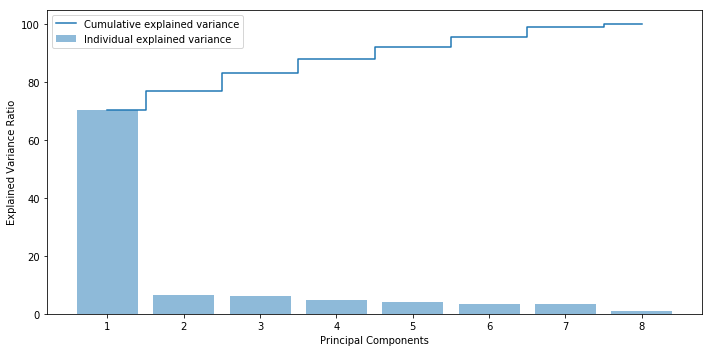

In [87]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vls.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vls.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

# Q10 Find correlation between components and features

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.